In [74]:
import tensorflow as tf
import tensorflow_data_validation as tfdv
import pandas as pd
import seaborn as sns

from experimental.datasets import head_dataset

In [75]:
path = '../../data/mcts-playouts'
samples, board_tensors, labels, logs = head_dataset(path, chunk=10000)

In [108]:
def skip_feature(feature_name):
    return (
        "TILE" in feature_name
        or "EDGE" in feature_name
        or "NODE" in feature_name
#         or "PORT" in feature_name
        # or "PLAYED" in feature_name
#         or "PLAYABLE" in feature_name
    )


columns = [i for i in samples.columns if not skip_feature(i)]
# columns = samples.columns

In [109]:
labels.columns = ['LABEL']
labels
df = pd.concat([samples[columns], labels], axis=1)
df.head()

,BANK_BRICK,BANK_DEV_CARDS,BANK_ORE,BANK_SHEEP,BANK_WHEAT,BANK_WOOD,P0_ACTUAL_VPS,P0_BRICK_AT_DISTANCE_0,P0_BRICK_AT_DISTANCE_1,P0_BRICK_AT_DISTANCE_2,...,PORT7_IS_THREE_TO_ONE,PORT7_IS_WHEAT,PORT7_IS_WOOD,PORT8_IS_BRICK,PORT8_IS_ORE,PORT8_IS_SHEEP,PORT8_IS_THREE_TO_ONE,PORT8_IS_WHEAT,PORT8_IS_WOOD,LABEL
0,19.0,25.0,19.0,19.0,19.0,19.0,1.0,0.0,0.0,0.00000,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.45
1,19.0,25.0,19.0,19.0,19.0,19.0,0.0,0.0,0.0,0.00000,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.16
2,19.0,25.0,19.0,19.0,19.0,19.0,0.0,0.0,0.0,0.00000,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.24
3,19.0,25.0,19.0,19.0,19.0,19.0,0.0,0.0,0.0,0.00000,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.15
4,19.0,25.0,19.0,19.0,19.0,19.0,1.0,0.0,0.0,0.05556,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.32


In [110]:
df.describe()

,BANK_BRICK,BANK_DEV_CARDS,BANK_ORE,BANK_SHEEP,BANK_WHEAT,BANK_WOOD,P0_ACTUAL_VPS,P0_BRICK_AT_DISTANCE_0,P0_BRICK_AT_DISTANCE_1,P0_BRICK_AT_DISTANCE_2,...,PORT7_IS_THREE_TO_ONE,PORT7_IS_WHEAT,PORT7_IS_WOOD,PORT8_IS_BRICK,PORT8_IS_ORE,PORT8_IS_SHEEP,PORT8_IS_THREE_TO_ONE,PORT8_IS_WHEAT,PORT8_IS_WOOD,LABEL
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,...,10000.000000,10000.000000,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.000000
mean,16.354800,15.984800,11.673200,14.493200,15.445200,13.746000,3.820300,0.011759,0.047821,0.058874,...,0.221600,0.778400,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.249997
std,1.526155,4.950537,4.322808,2.824244,2.599014,4.664639,2.424004,0.029479,0.033359,0.035872,...,0.415344,0.415344,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.398087
min,10.000000,9.000000,0.000000,6.000000,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.000000
25%,15.000000,12.000000,9.000000,13.000000,14.000000,11.000000,2.000000,0.000000,0.027780,0.055560,...,0.000000,1.000000,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.000000
50%,16.000000,14.000000,12.000000,15.000000,16.000000,15.000000,3.000000,0.000000,0.055560,0.055560,...,0.000000,1.000000,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.000000
75%,17.000000,21.000000,15.000000,16.000000,18.000000,17.000000,5.000000,0.000000,0.055560,0.083330,...,0.000000,1.000000,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.330000
max,19.000000,25.000000,19.000000,19.000000,19.000000,19.000000,10.000000,0.138890,0.138890,0.194440,...,1.000000,1.000000,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.000000


In [111]:
corr = df.corr()
corr['LABEL']
# sns.heatmap(corr)

BANK_BRICK              -0.000006
BANK_DEV_CARDS          -0.000013
BANK_ORE                -0.000010
BANK_SHEEP              -0.000009
BANK_WHEAT              -0.000002
                           ...   
PORT8_IS_SHEEP                NaN
PORT8_IS_THREE_TO_ONE         NaN
PORT8_IS_WHEAT                NaN
PORT8_IS_WOOD                 NaN
LABEL                    1.000000
Name: LABEL, Length: 232, dtype: float64

(<AxesSubplot:>,
 24,
 Index(['P0_ACTUAL_VPS', 'P0_CITIES_LEFT', 'P0_HAS_ROAD',
        'P0_ORE_AT_DISTANCE_0', 'P0_ORE_AT_DISTANCE_3', 'P0_ORE_PRODUCTION',
        'P0_PUBLIC_VPS', 'P0_SETTLEMENTS_LEFT', 'P0_WHEAT_AT_DISTANCE_0',
        'P0_WHEAT_PRODUCTION', 'P0_WOOD_AT_DISTANCE_2', 'P0_WOOD_IN_HAND',
        'P0_WOOD_PRODUCTION', 'P1_WHEAT_PRODUCTION', 'P1_WOOD_AT_DISTANCE_1',
        'P1_WOOD_AT_DISTANCE_2', 'P2_ORE_AT_DISTANCE_1',
        'P2_WHEAT_AT_DISTANCE_1', 'P2_WHEAT_AT_DISTANCE_2',
        'P3_BRICK_PRODUCTION', 'P3_MONOPOLY_PLAYED', 'P3_SHEEP_AT_DISTANCE_0',
        'P3_SHEEP_PRODUCTION', 'LABEL'],
       dtype='object'))

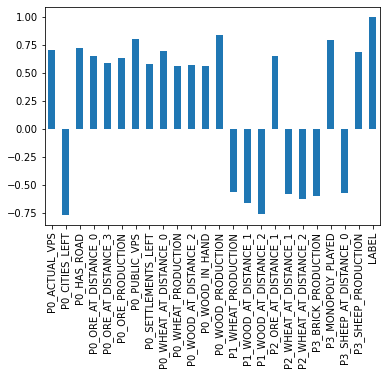

In [116]:
label_corr = corr['LABEL']
very_correlated = label_corr[abs(label_corr) > 0.55]
very_correlated.index, len(very_correlated)
very_correlated.plot.bar(), len(very_correlated), very_correlated.index

In [82]:
stats = tfdv.generate_statistics_from_dataframe(df[very_correlated.index])
tfdv.visualize_statistics(stats)